In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import glob
%matplotlib inline
#%matplotlib notebook
# Get a list of all the CSV files in the current directory
csv_files = glob.glob("*.csv")
(csv_files)


['4U 1957+115.csv',
 '4U 1630-472.csv',
 'H 1743-322.csv',
 'XTE J1901+014.csv',
 'GS 2000+251.csv',
 'XTE J1859+226.csv',
 'XTE J1752-223.csv',
 'XTE J1908+094.csv',
 'MAXI J1803-298.csv',
 'Swift J1753.5-0127.csv',
 'V404 Cyg.csv',
 'EXO 1722-363.csv',
 'XTE J1650-500.csv',
 'Cyg.X-1.csv',
 '1A 0620-00.csv',
 'AT 2019wey.csv',
 '4U 1543-475.csv',
 'XTE J1550-564.csv',
 'V4641 Sgr.csv',
 'GS 1354-64.csv',
 'XTE J1118+480.csv',
 'EXO 1846-031.csv',
 'GX 339-4.csv',
 'SLX 1746-331.csv']

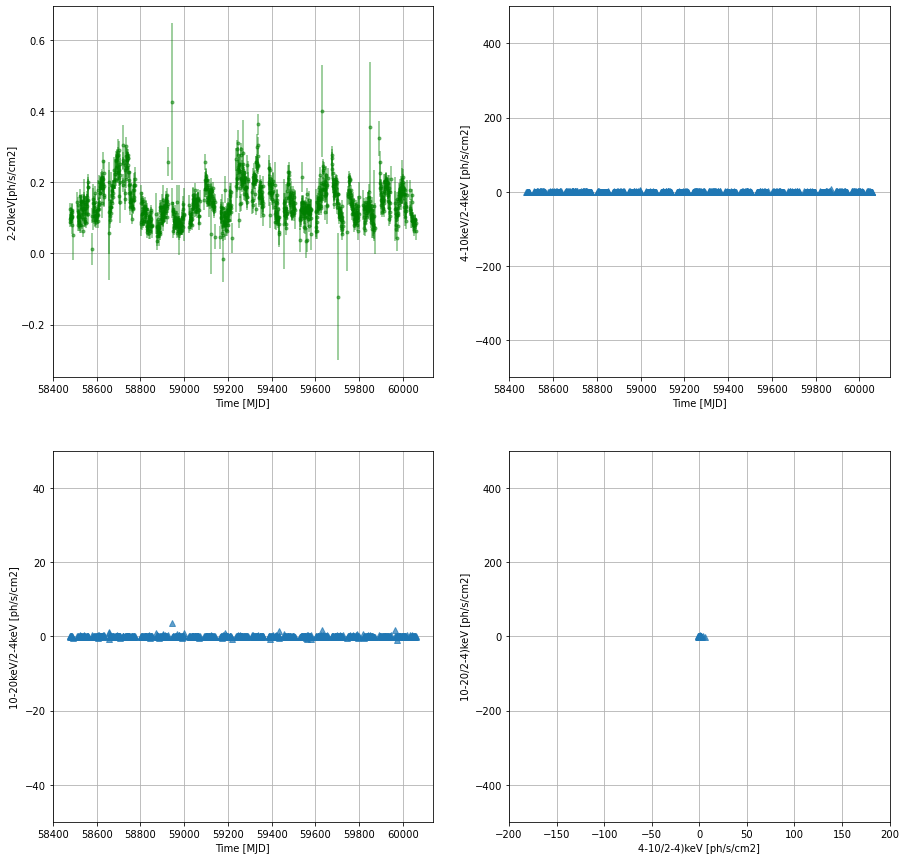

/tmp/ipykernel_6208/3794410943.py:50: RuntimeWarning: divide by zero encountered in true_divide
  r_B1= np.array(error2)/np.array(twofourkeV)
/tmp/ipykernel_6208/3794410943.py:52: RuntimeWarning: divide by zero encountered in true_divide
  div1=fourtenkeV/twofourkeV
/tmp/ipykernel_6208/3794410943.py:55: RuntimeWarning: divide by zero encountered in true_divide
  fourtenvstwofour=(fourtenkeV/twofourkeV)*(r_A1+r_B1)
/tmp/ipykernel_6208/3794410943.py:61: RuntimeWarning: divide by zero encountered in true_divide
  r_B2= np.array(error2)/np.array(twofourkeV)
/tmp/ipykernel_6208/3794410943.py:63: RuntimeWarning: divide by zero encountered in true_divide
  tentwntyvstwofour=(tentwentykeV/twofourkeV)*(r_A2+r_B2)
/tmp/ipykernel_6208/3794410943.py:65: RuntimeWarning: divide by zero encountered in true_divide
  div2=tentwentykeV/twofourkeV


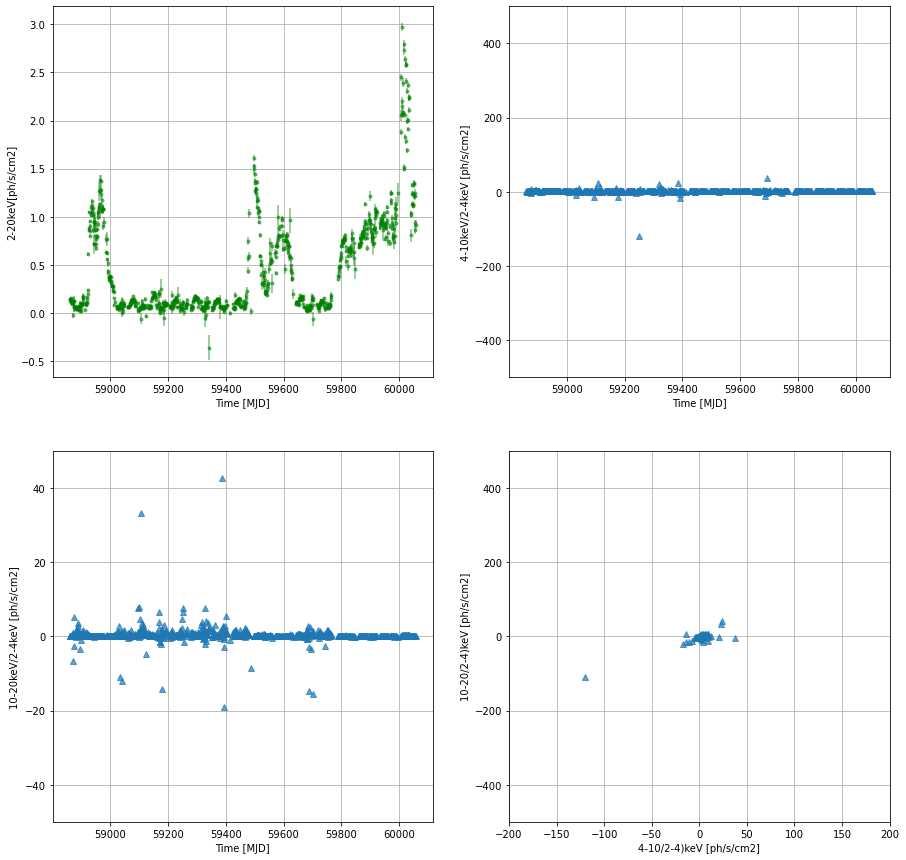

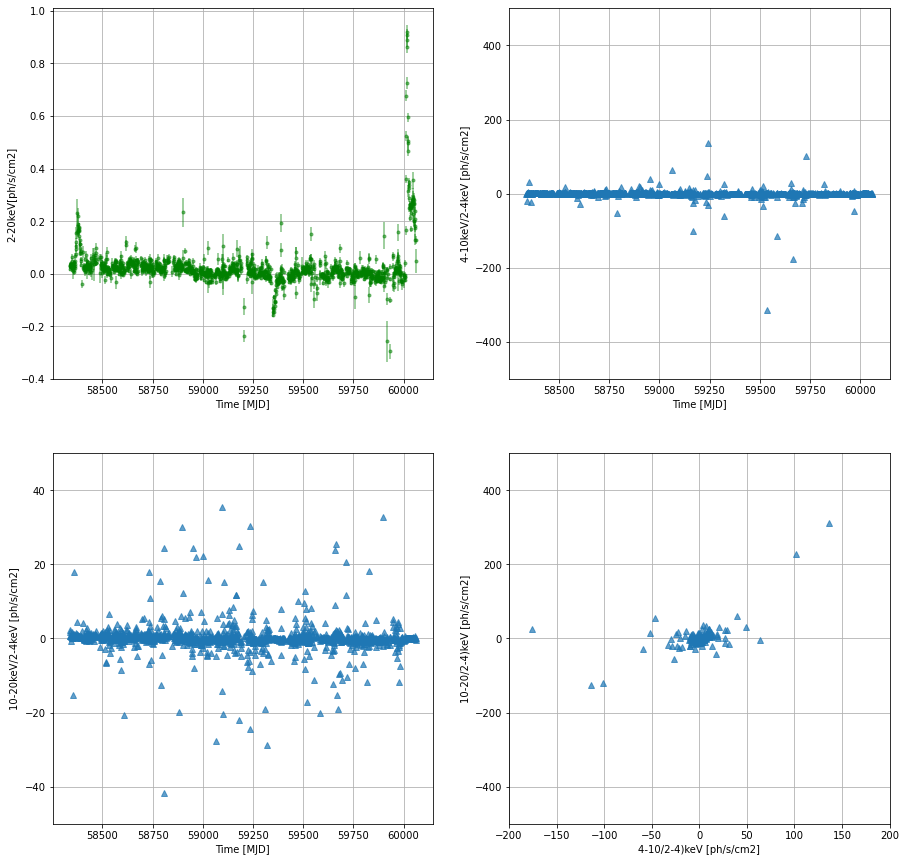

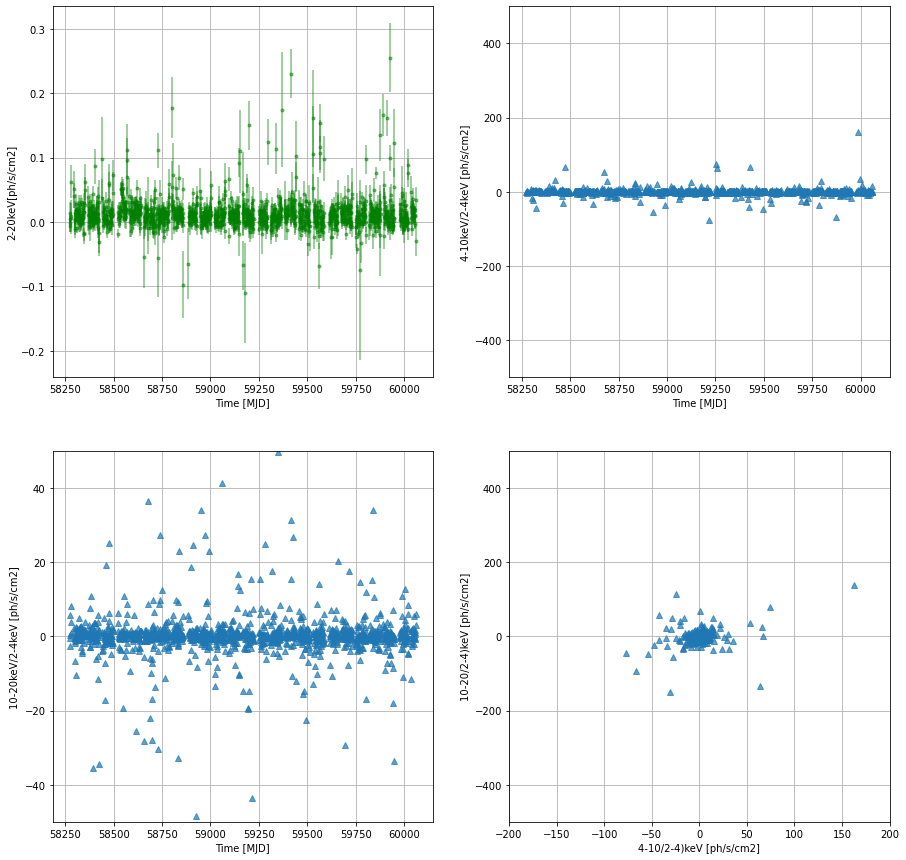

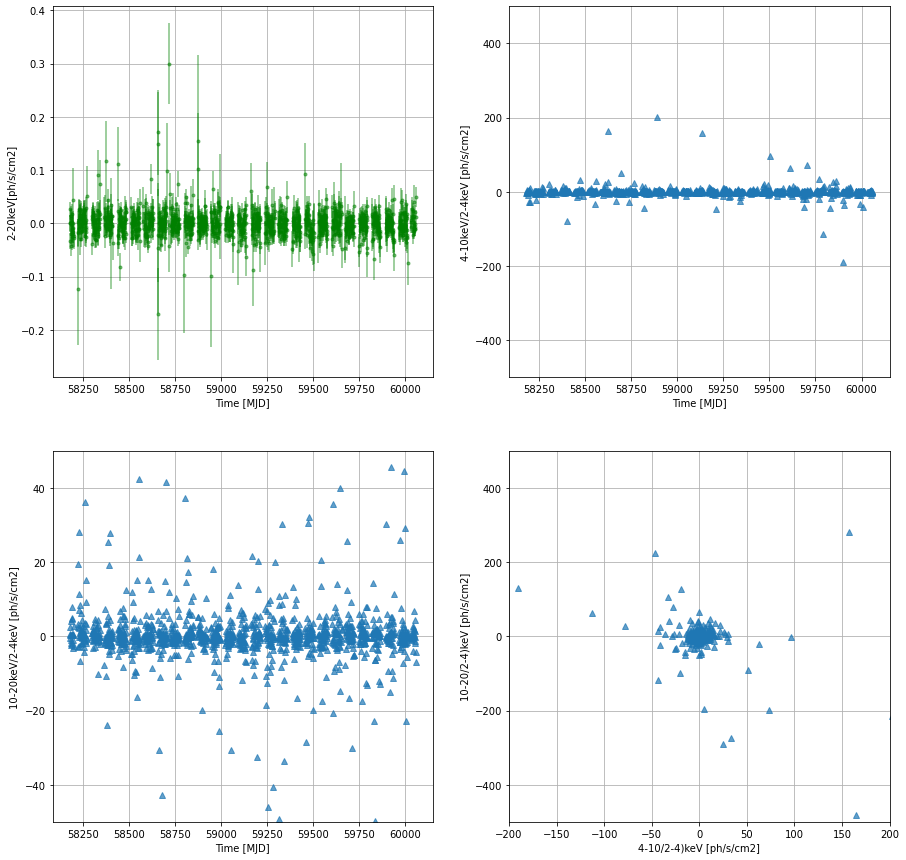

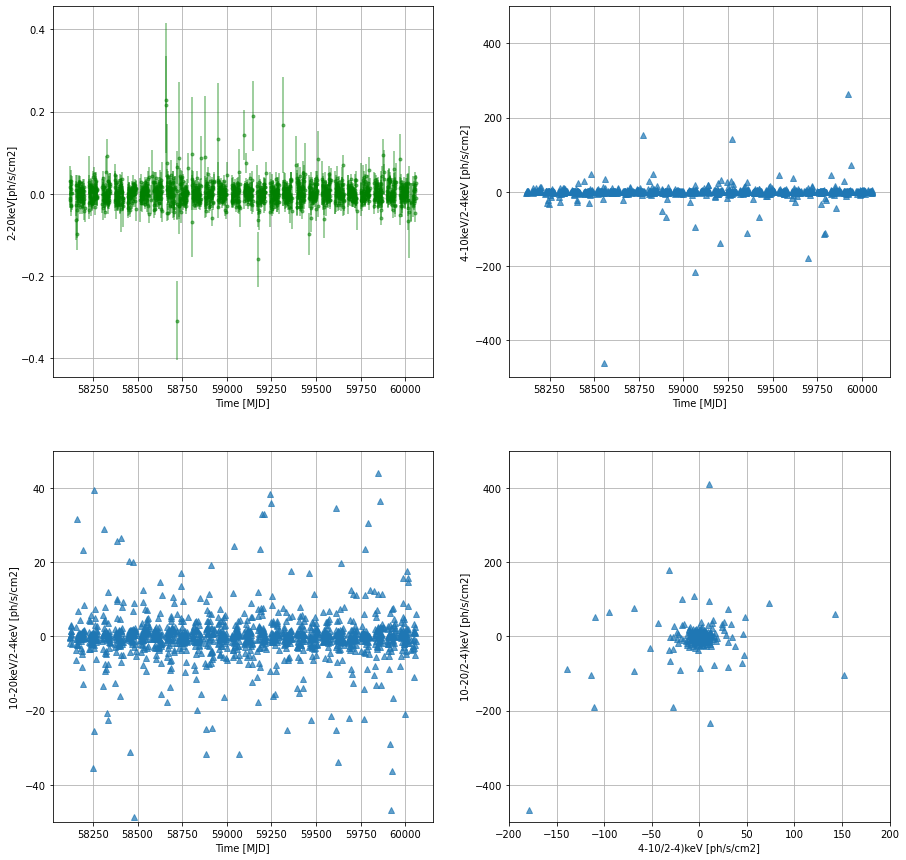

/tmp/ipykernel_6208/3794410943.py:50: RuntimeWarning: invalid value encountered in true_divide
  r_B1= np.array(error2)/np.array(twofourkeV)
/tmp/ipykernel_6208/3794410943.py:61: RuntimeWarning: invalid value encountered in true_divide
  r_B2= np.array(error2)/np.array(twofourkeV)


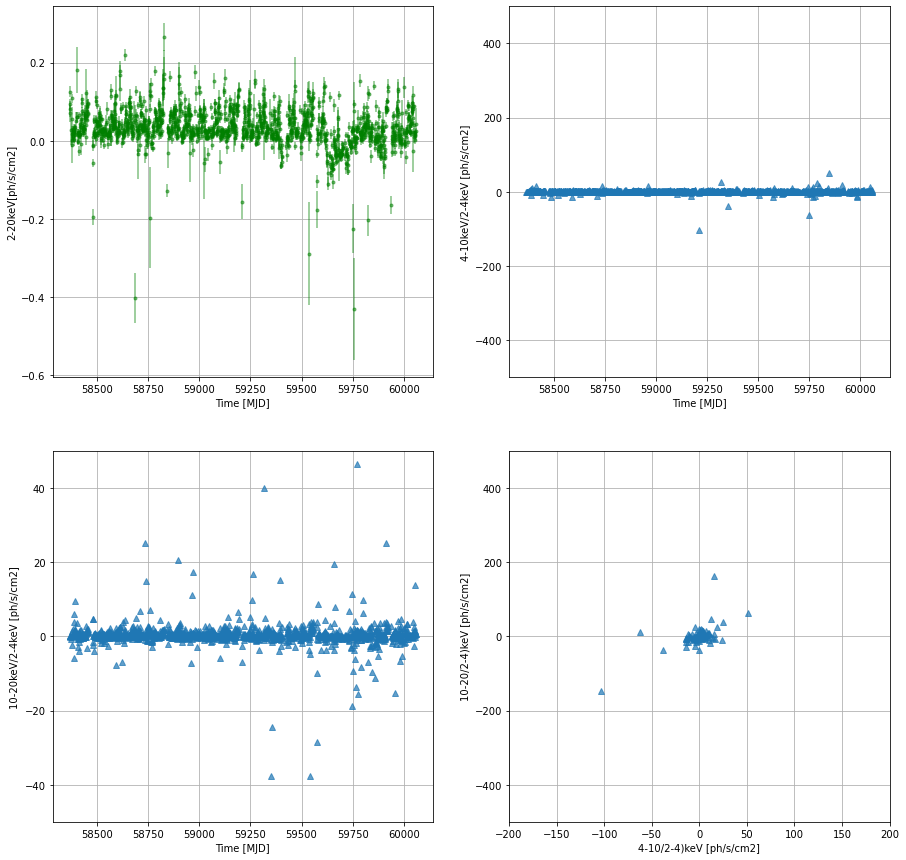

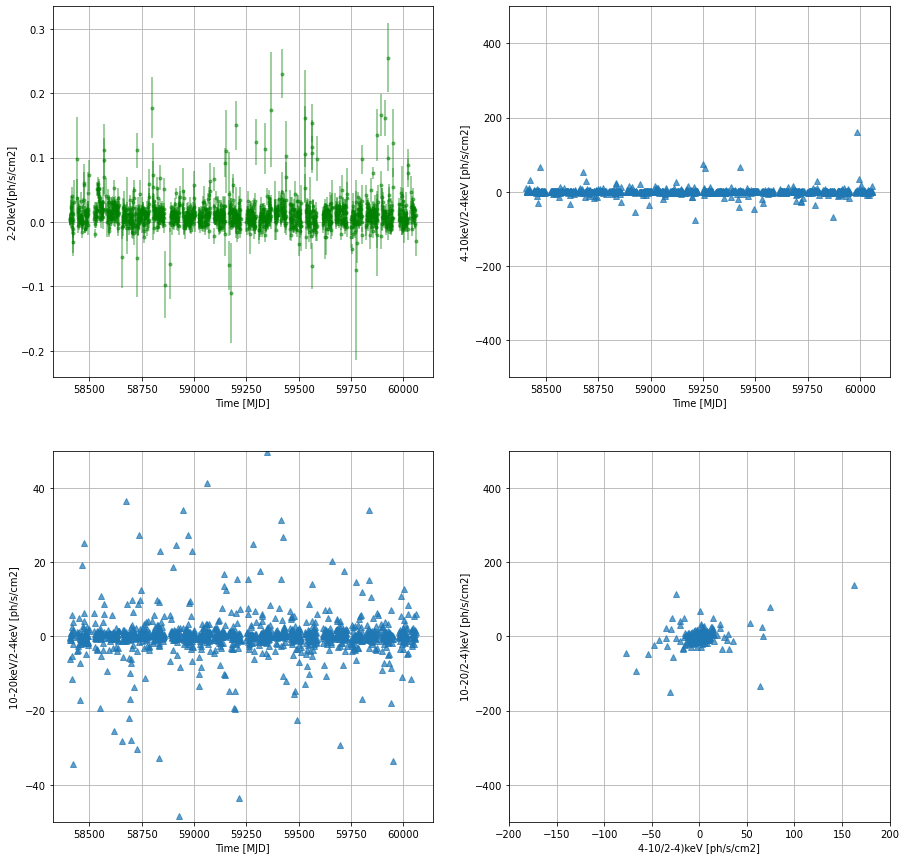

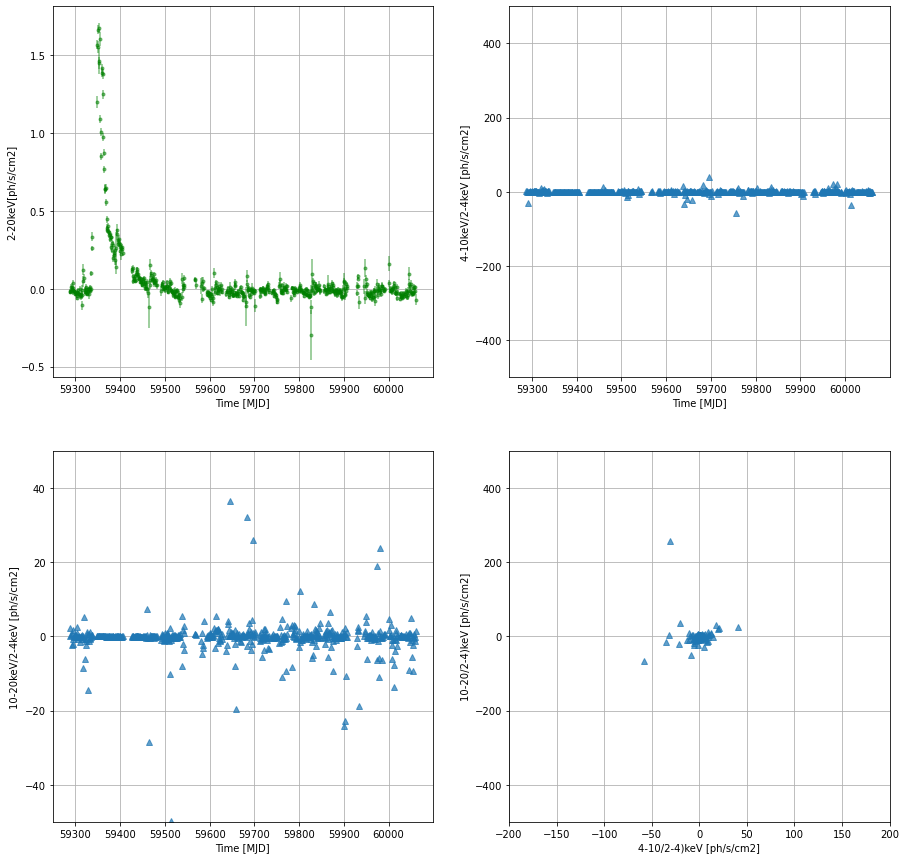

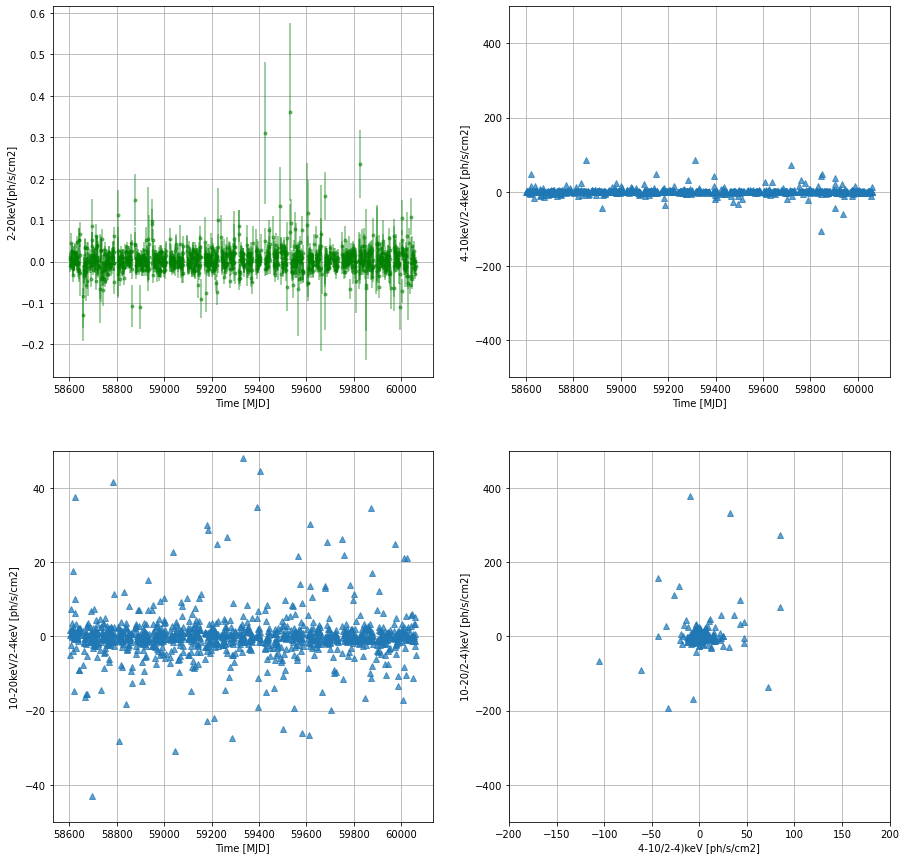

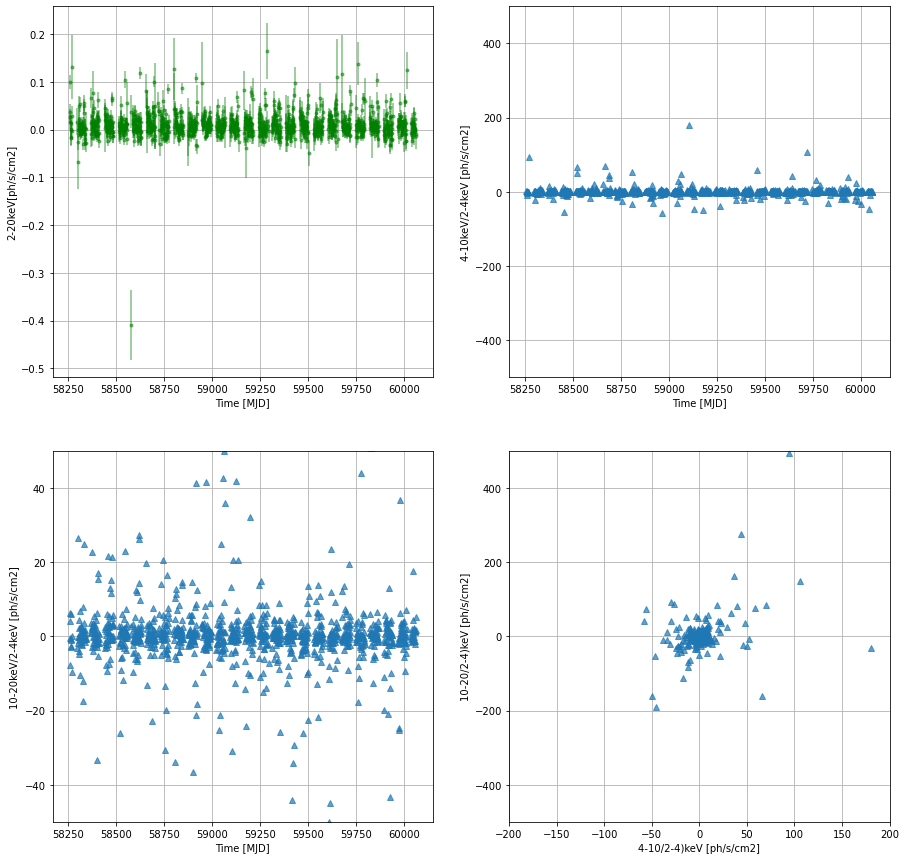

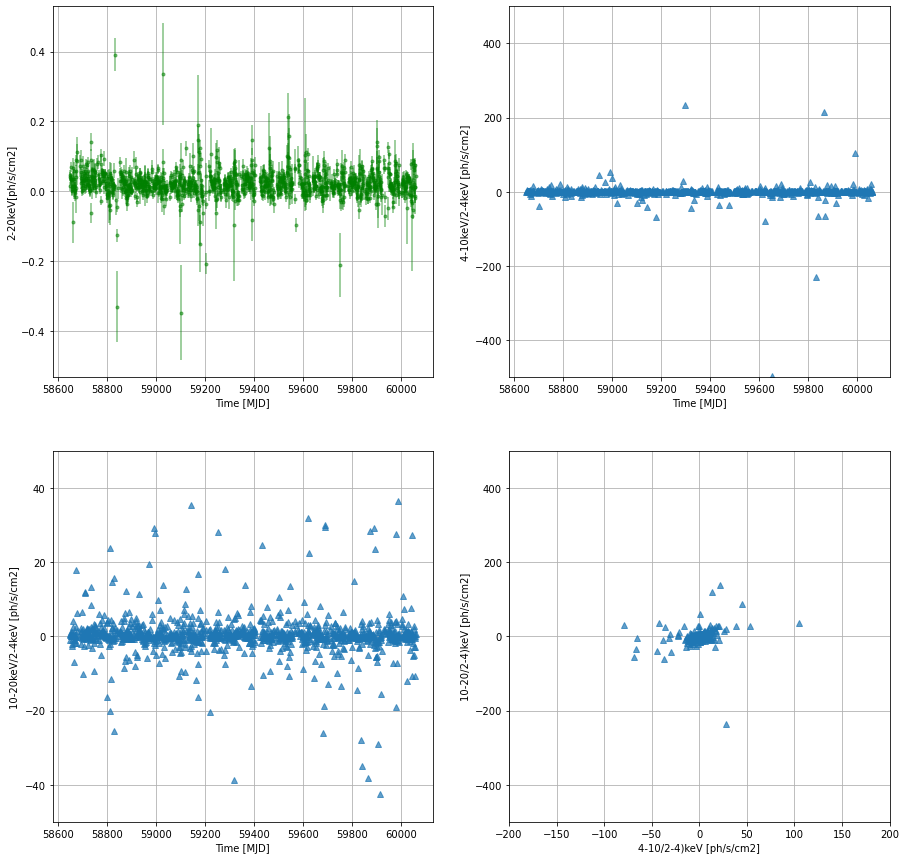

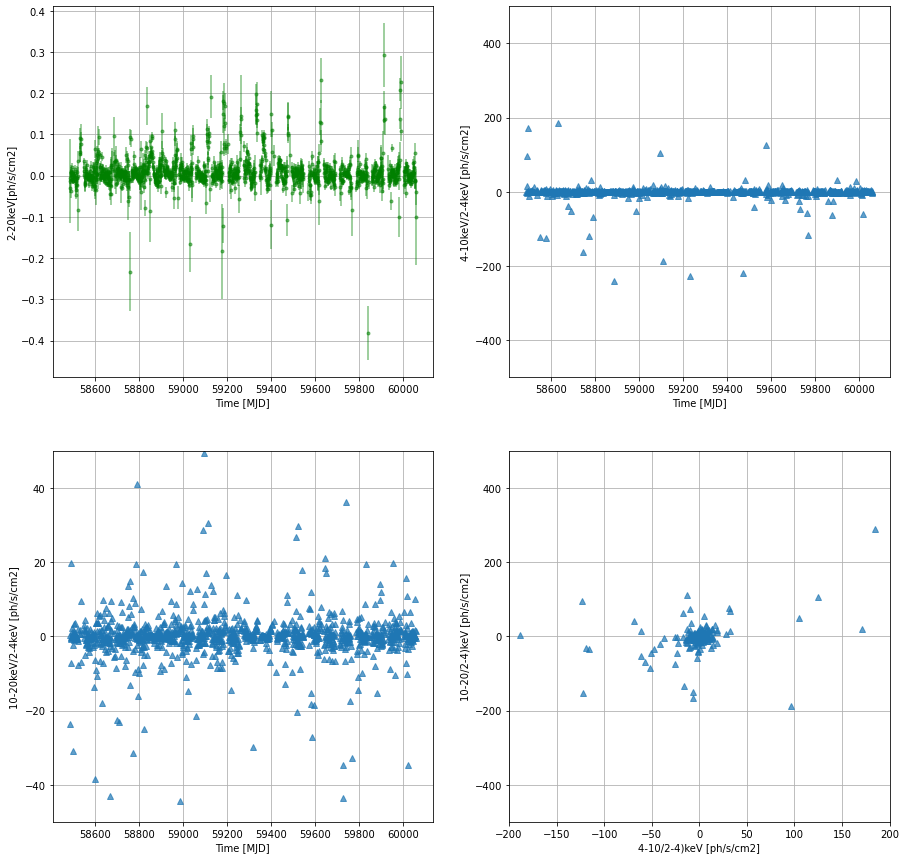

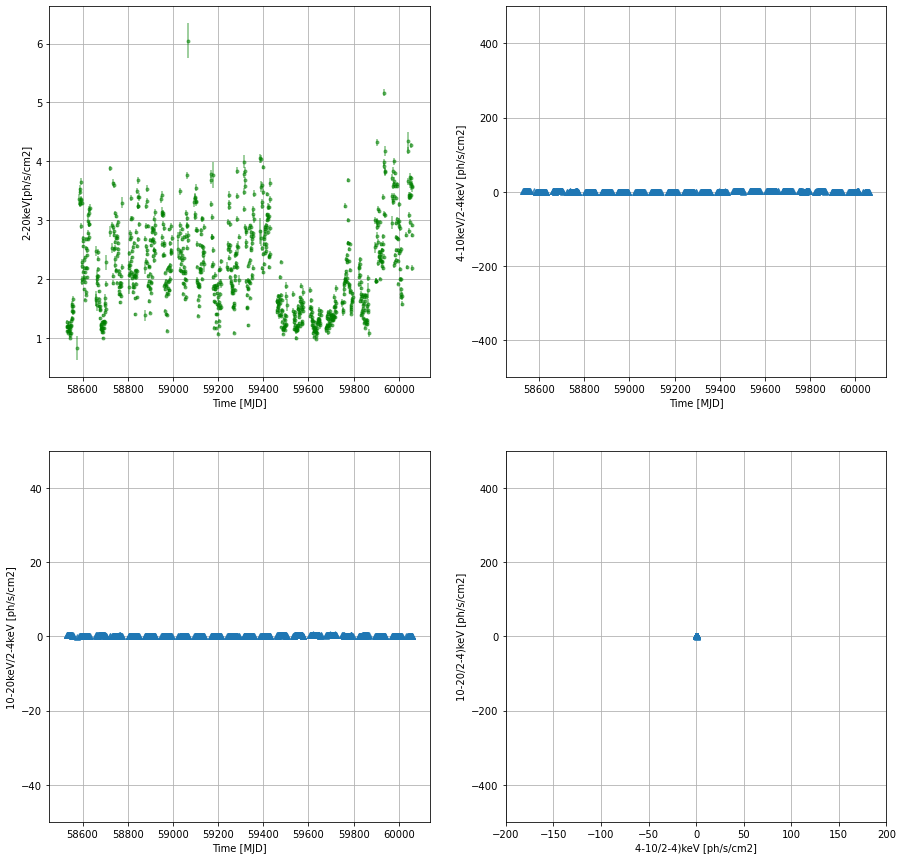

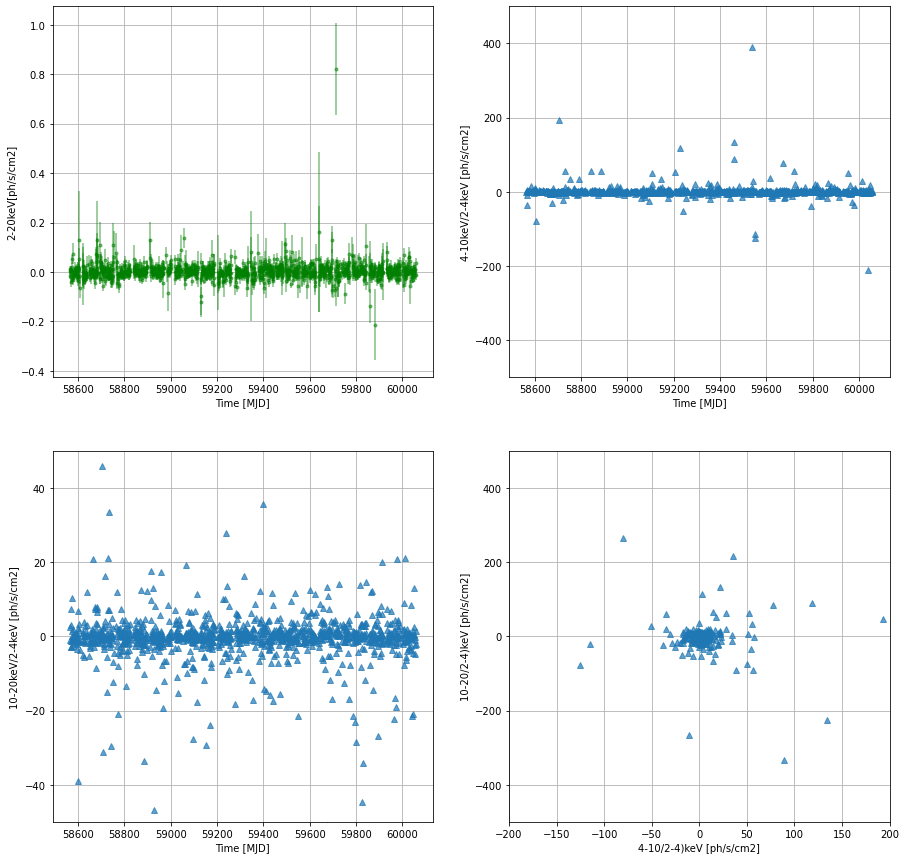

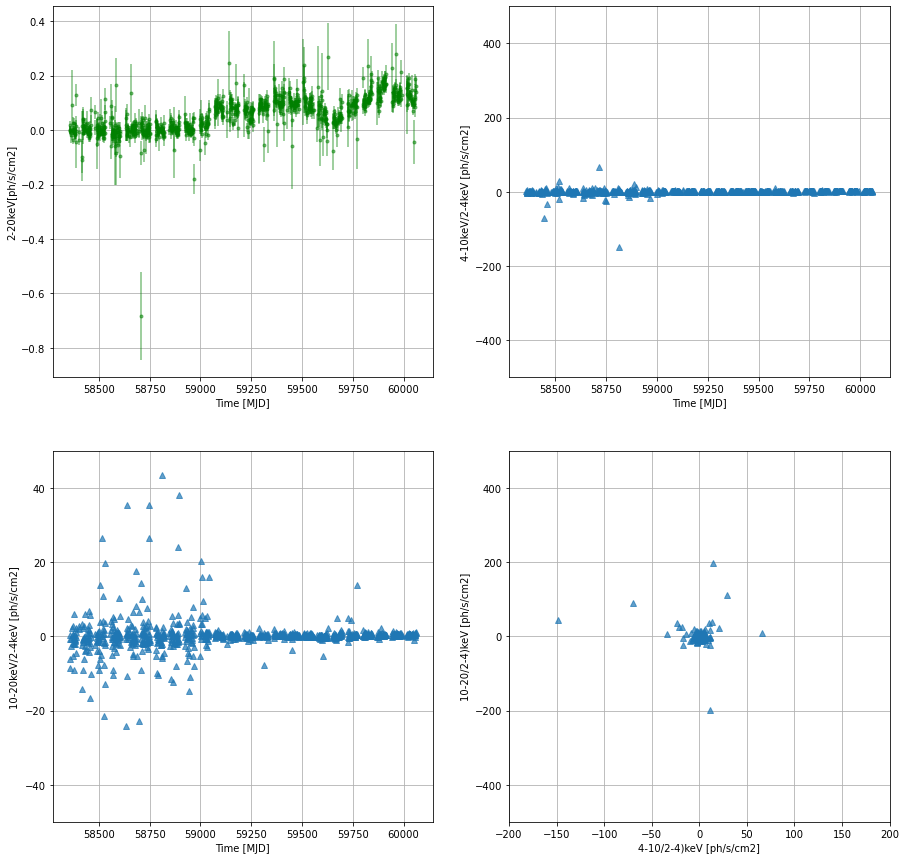

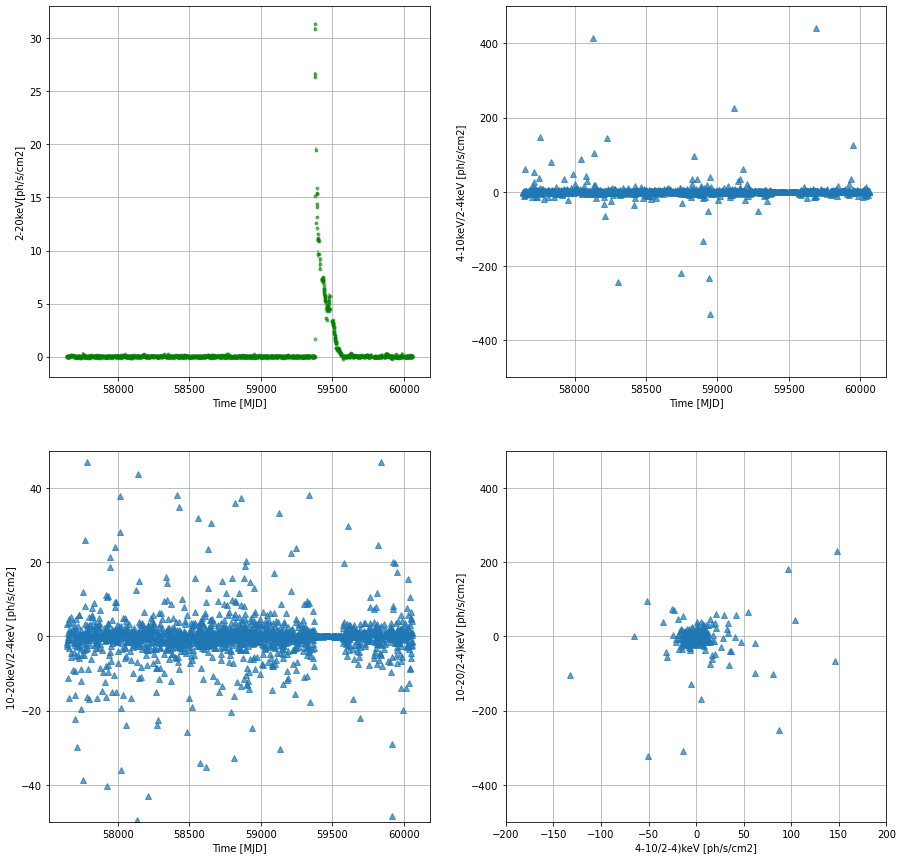

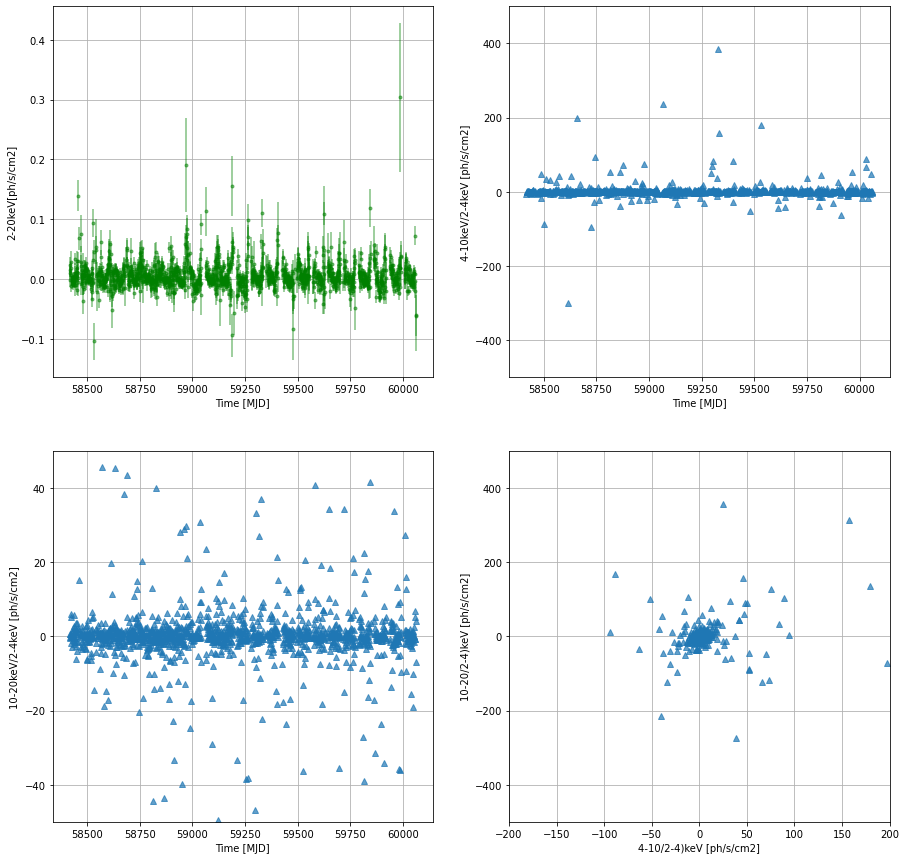

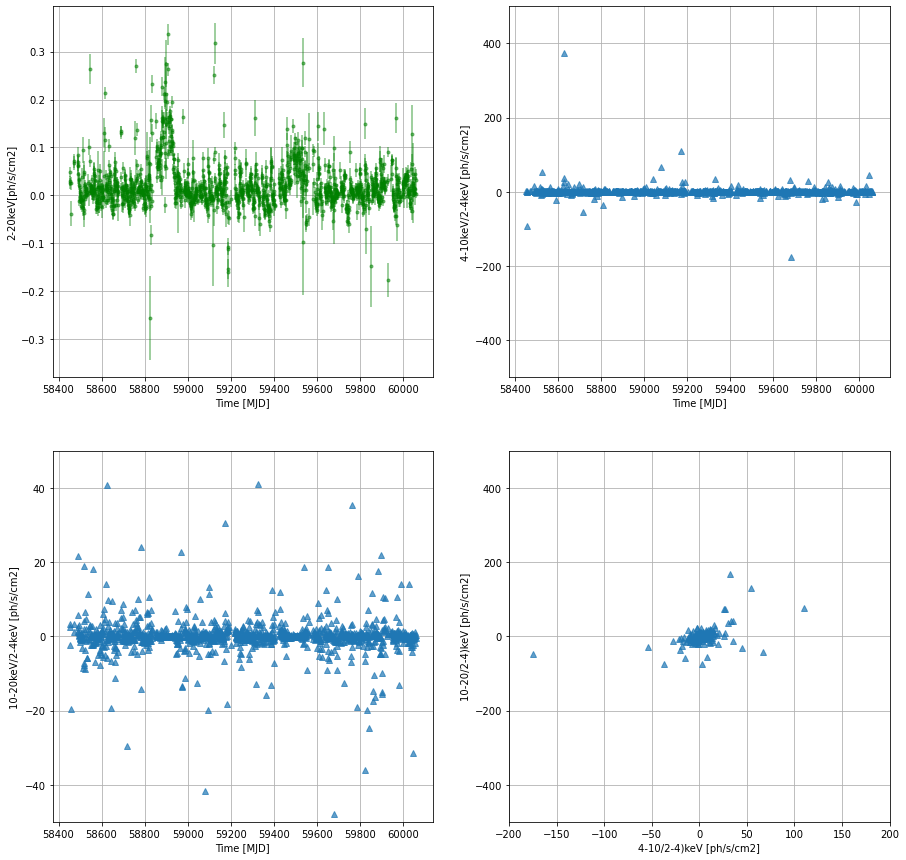

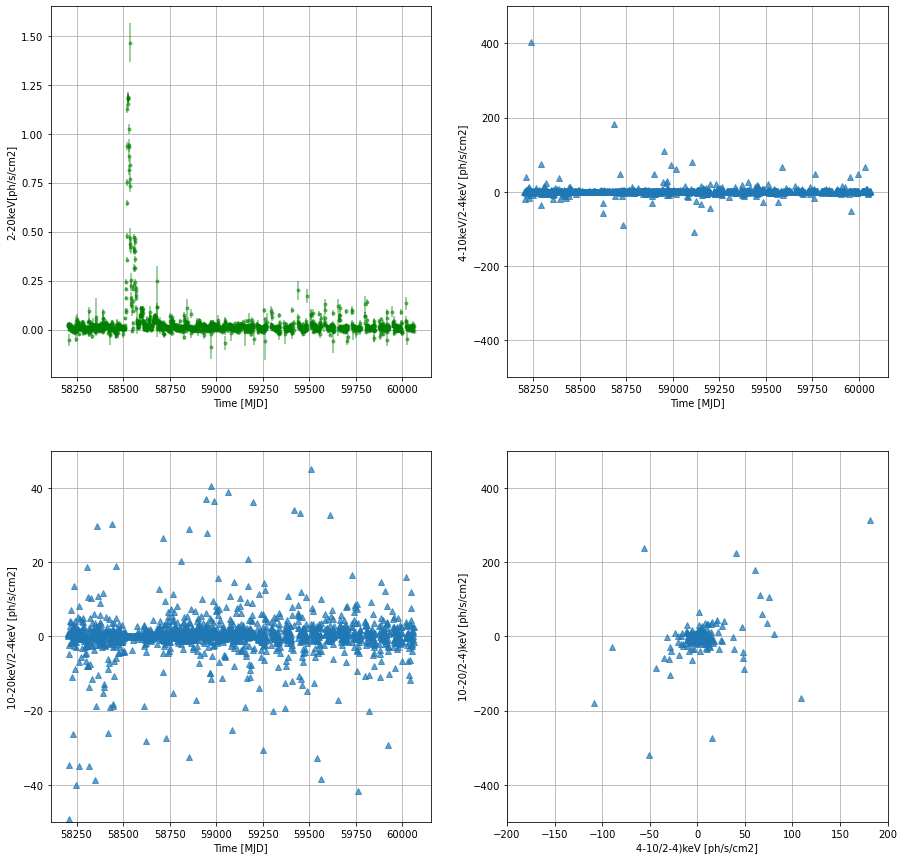

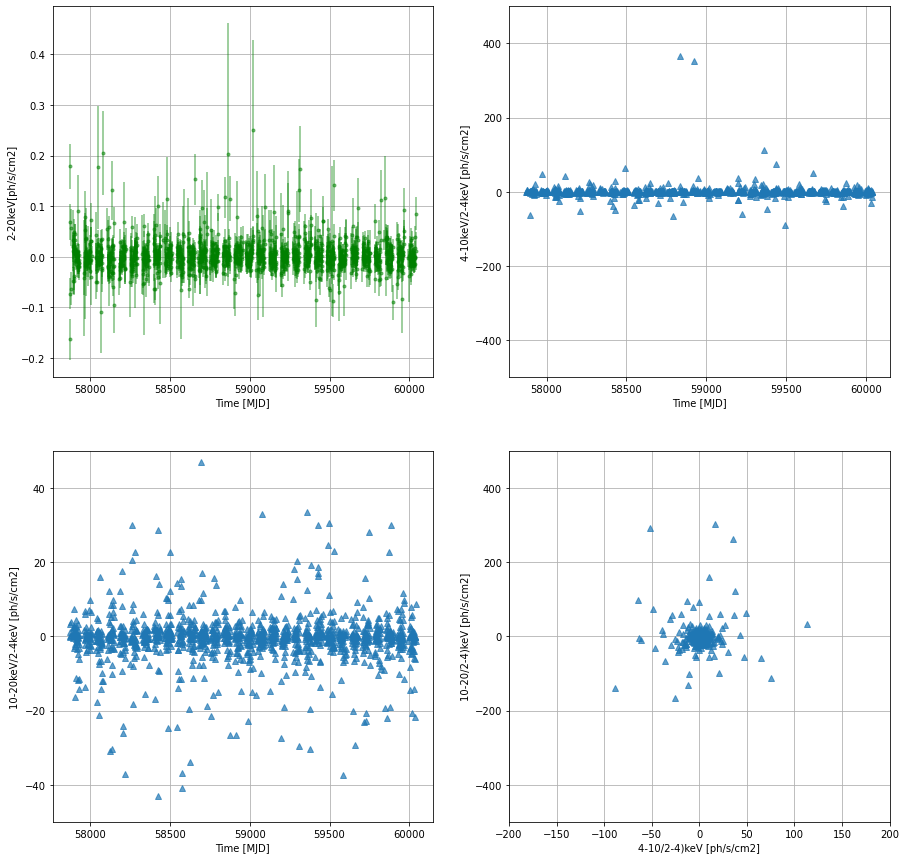

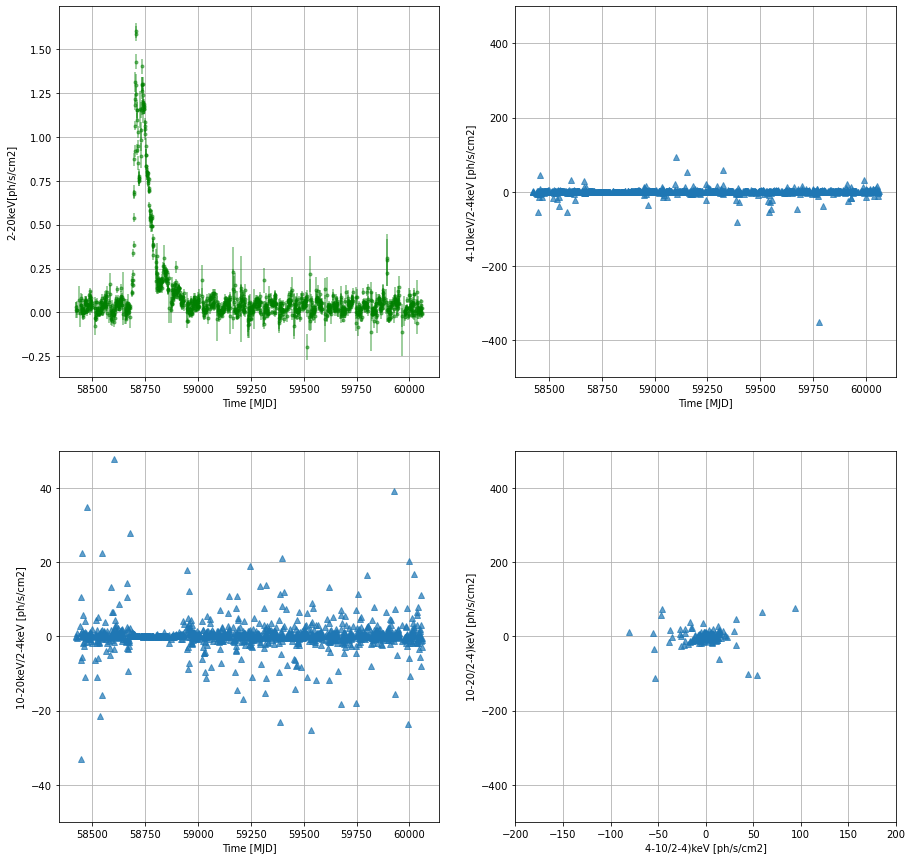

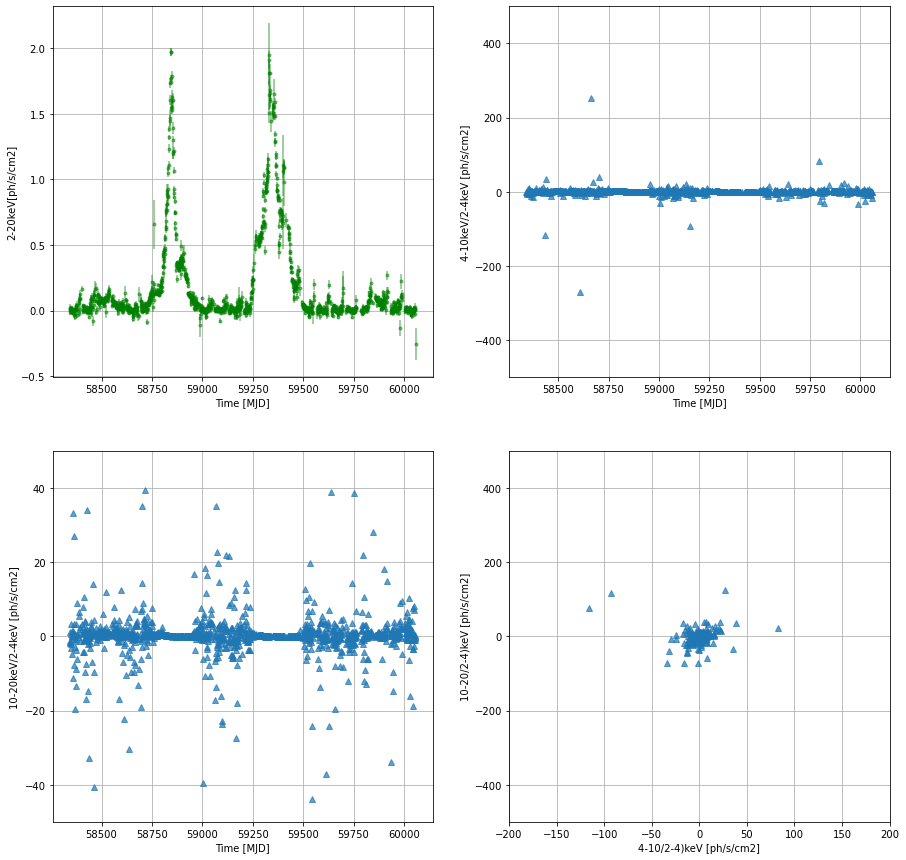

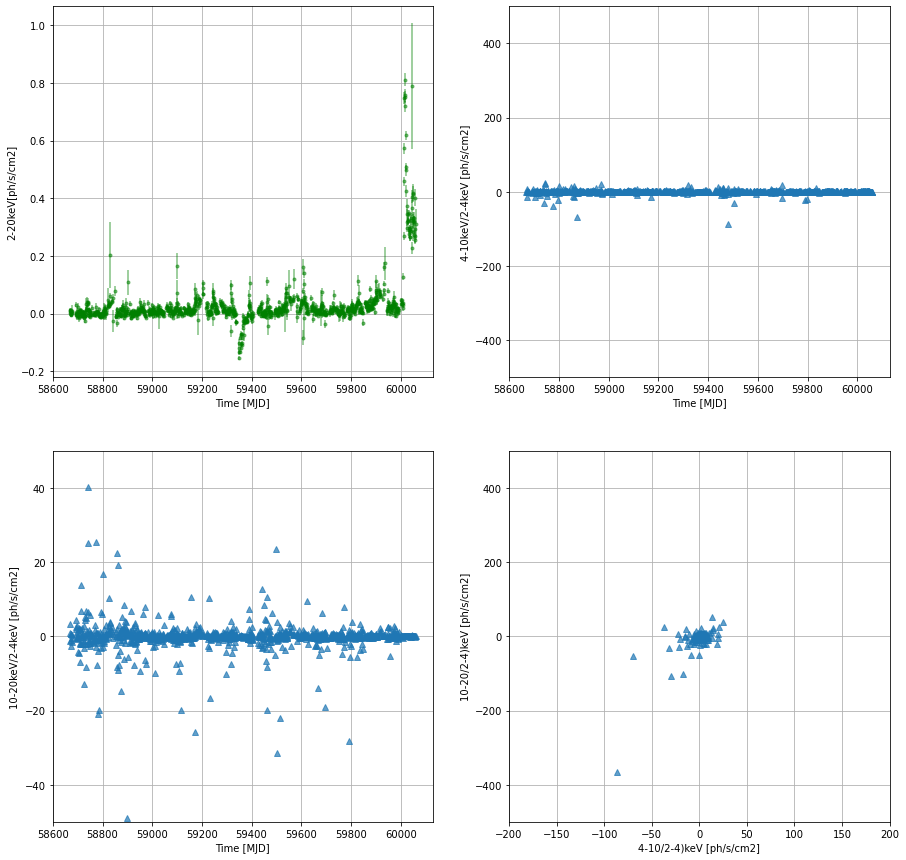

In [6]:
# The black hole candidates
#file_names = ["1A 0620-00.csv", "4U 1957+115.csv","4U 1630-472.csv"] 

for file_name in csv_files:
    with open(file_name, 'r') as file:

        csvreader = csv.reader(file,delimiter="\t")
        for row in csvreader:

            col1_data = []
            col2_data = []
            col3_data = []
            col4_data = []
            col5_data = []
            col6_data = []
            col7_data = []
            col8_data = []
            col9_data = []

            # Loop through the rows in the CSV file
            for row in csvreader:
                col1_data.append(float(row[0]))
                col2_data.append(float(row[1]))
                col3_data.append(float(row[2]))
                col4_data.append(float(row[3]))
                col5_data.append(float(row[4]))
                col6_data.append(float(row[5])) 
                col7_data.append(float(row[6]))
                col8_data.append(float(row[7]))
                col9_data.append(float(row[8]))

        MJDcenter = np.array(col1_data)
        twotwentykeV = np.array(col2_data)
        error1 = np.array(col3_data)
        twofourkeV= np.array(col4_data)
        error2= np.array(col5_data)
        fourtenkeV= np.array(col6_data)
        error3= np.array(col7_data)
        tentwentykeV= np.array(col8_data)
        error4= np.array(col9_data)

        # error propagation for 4-10 keV / Time
        # (A/B)*(r_A+r_B)  .................(1)
        # where r_A and r_B is given as r_A = error_A/A , r_B = error_B/B
        # error associated with A

        r_A1 = np.array(error3)/np.array(fourtenkeV)

        # similarly, the error associated with B
        r_B1= np.array(error2)/np.array(twofourkeV)

        div1=fourtenkeV/twofourkeV

        # error propagation
        fourtenvstwofour=(fourtenkeV/twofourkeV)*(r_A1+r_B1)

        # error associated with A
        r_A2 = np.array(error4)/np.array(tentwentykeV)

        # similarly, the error associated with B
        r_B2= np.array(error2)/np.array(twofourkeV)
        # error propagation
        tentwntyvstwofour=(tentwentykeV/twofourkeV)*(r_A2+r_B2)

        div2=tentwentykeV/twofourkeV

        # plotting the results 
        fig = plt.figure(figsize=(15, 15))
        plt.subplot(2, 2, 1)
        plt.errorbar(MJDcenter,twotwentykeV, yerr=error1,fmt='.g', alpha = 0.5);
        plt.xlabel('Time [MJD]')
        plt.ylabel('2-20keV[ph/s/cm2]')
        plt.grid()

        plt.subplot(2, 2, 2)
        plt.plot(MJDcenter,div1,'^', alpha = 0.7)
        plt.ylim([-500, 500])
        plt.xlabel('Time [MJD]')
        plt.ylabel('4-10keV/2-4keV [ph/s/cm2]')
        #plt.errorbar(MJDcenter,fourtenvstwofour, yerr=error1, fmt='.k', alpha = 0.5);
        plt.grid()


        plt.subplot(2, 2, 3)
        plt.plot(MJDcenter,div2,'^', alpha = 0.7)
        #ax.tick_params(labelcolor='black', labelsize='medium', width=3)
        plt.ylim([-50, 50])
        plt.xlabel('Time [MJD]')
        plt.ylabel('10-20keV/2-4keV [ph/s/cm2]')
        plt.title('')
        plt.grid()

        plt.subplot(2, 2, 4)
        plt.plot(div1,div2,'^', alpha = 0.7)
        plt.xlabel('4-10/2-4)keV [ph/s/cm2]')
        plt.ylabel('10-20/2-4)keV [ph/s/cm2]')
        plt.ylim([-500, 500])
        plt.xlim([-200, 200])

        plt.grid()
       # plt.savefig('catalog_variability.pdf',dpi=1000)
        plt.show()
